# Sales Analysis

In [64]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Merginng 12 months of sales data into a single file

In [65]:
path = 'E:\Faraz\Learning\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
all_files = glob.glob(path + '\\' + "*.csv")

In [66]:
all_files

['E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_August_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_December_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_January_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_July_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_June_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_March_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_May_2019.csv',
 'E:\\Faraz\\Learning\\Pandas-Da

In [67]:
df_all_files = (pd.read_csv(f) for f in all_files)

# Data Cleaning

In [68]:
all_files = pd.concat(df_all_files,ignore_index = True)

In [69]:
#drop null values
all_files.dropna(inplace = True)

In [70]:
all_files['Month'] = all_files['Order Date'].str[0:2]

In [71]:
all_files = all_files[all_files['Month'] != 'Or']

# Best Sales Month

In [72]:
all_files['Order Date'] = pd.to_datetime(all_files['Order Date'])

In [73]:
all_files['Month'] = all_files['Order Date'].dt.month

In [74]:
all_files.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [75]:
all_files['Quantity Ordered'] = pd.to_numeric(all_files['Quantity Ordered'])
all_files['Price Each'] = pd.to_numeric(all_files['Price Each'])

In [76]:
all_files['Billing'] = all_files['Quantity Ordered'] * all_files['Price Each']

In [77]:
plt.style.use('ggplot')
sales = all_files.groupby('Month').sum()

In [78]:
pd.options.display.float_format = '{:,.2f}'.format

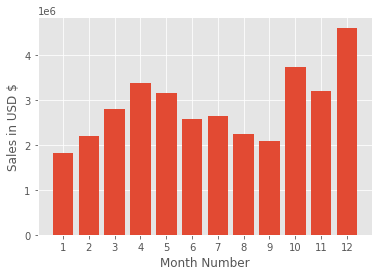

In [79]:
months = range(1,13)
plt.bar(months,sales['Billing'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month Number')
plt.show()

In [80]:
sales['Billing'].max()

4613443.340001534

In [81]:
# Answer - Best Month - December/ 4613443.340001534

# Which US city has the most number of sales

In [82]:
all_files['City'] = all_files['Purchase Address'].apply(lambda x : x.split(',')[1] +x.split(',')[2])

In [83]:
city_sales = all_files.groupby('City')['Billing'].sum()

In [84]:
city_sales


City
 Atlanta GA 30301         2,795,498.58
 Austin TX 73301          1,819,581.75
 Boston MA 02215          3,661,642.01
 Dallas TX 75001          2,767,975.40
 Los Angeles CA 90001     5,452,570.80
 New York City NY 10001   4,664,317.43
 Portland ME 04101          449,758.27
 Portland OR 97035        1,870,732.34
 San Francisco CA 94016   8,262,203.91
 Seattle WA 98101         2,747,755.48
Name: Billing, dtype: float64

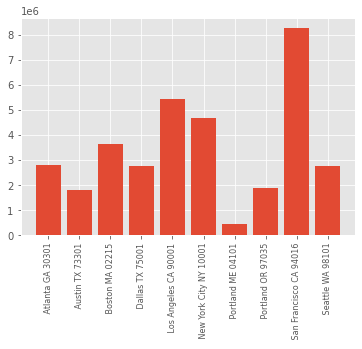

In [85]:
cities = [city for city,df in all_files.groupby('City')]
plt.bar(cities,city_sales)
plt.xticks(cities,rotation = 'vertical',size=8)
plt.show()

In [86]:
# Answer -- San Fransisco(CA)

# Best Advertisement Timing

In [87]:
all_files['hour'] = all_files['Order Date'].dt.hour

In [88]:
all_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Billing,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA 90001,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA 94016,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA 94016,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA 94016,17


In [89]:
best_hour = all_files.groupby('hour').sum()

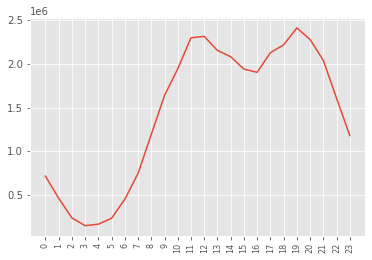

In [90]:
hour = [hour for hour,df in all_files.groupby('hour')]
plt.plot(hour,best_hour['Billing'])
plt.xticks(hour,rotation = 'vertical',size=8)
plt.show()

In [91]:
# Answer - Between 11 - 19

# What products are most often sold together

In [50]:
product = all_files[['Product','Order Date']]

In [51]:
product = product.groupby('Order Date').filter(lambda x : len(x) > 1)

In [52]:
foo = lambda a : "/".join(a)

In [53]:
product = product.groupby('Order Date').agg({'Product': foo}).reset_index()

In [54]:
temp = product.groupby('Order Date').count().reset_index()

In [55]:
product['Product'].where(product['Product'].apply(lambda x: len(x) == 47)).dropna()

26       Apple Airpods Headphones/AAA Batteries (4-pack)
35       AAA Batteries (4-pack)/Lightning Charging Cable
42       Apple Airpods Headphones/AAA Batteries (4-pack)
97       Apple Airpods Headphones/AAA Batteries (4-pack)
98       Apple Airpods Headphones/27in 4K Gaming Monitor
                              ...                       
34536    Apple Airpods Headphones/34in Ultrawide Monitor
34543    Apple Airpods Headphones/AAA Batteries (4-pack)
34585    Lightning Charging Cable/AAA Batteries (4-pack)
34594    Bose SoundSport Headphones/USB-C Charging Cable
34597    AAA Batteries (4-pack)/Lightning Charging Cable
Name: Product, Length: 2362, dtype: object

In [92]:
df = all_files[all_files['Order ID'].duplicated(keep=False)]

In [94]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

<ipython-input-94-01b7ff8d2183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [96]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [97]:
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [102]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [103]:
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [104]:
#Answer = Counter({('iPhone', 'Lightning Charging Cable'): 1005

# What Product got Sold the most and why?

In [105]:
product_group = all_files.groupby('Product').sum()

In [106]:
product_group

,Quantity Ordered,Price Each,Month,Billing,hour
Product,,,,,
20in Monitor,4129,"451,068.99",29336,"454,148.71",58764
27in 4K Gaming Monitor,6244,"2,429,637.70",44440,"2,435,097.56",90916
27in FHD Monitor,7550,"1,125,974.93",52558,"1,132,424.50",107540
34in Ultrawide Monitor,6199,"2,348,718.19",43304,"2,355,558.01",89076
AA Batteries (4-pack),27635,"79,015.68",145558,"106,118.40",298342
AAA Batteries (4-pack),31017,"61,716.59",146370,"92,740.83",297332
Apple Airpods Headphones,15661,"2,332,350.00",109477,"2,349,150.00",223304
Bose SoundSport Headphones,13457,"1,332,366.75",94113,"1,345,565.43",192445
Flatscreen TV,4819,"1,440,000.00",34224,"1,445,700.00",68815


In [116]:
prod = [prod for prod,df in all_files.groupby('Product')]


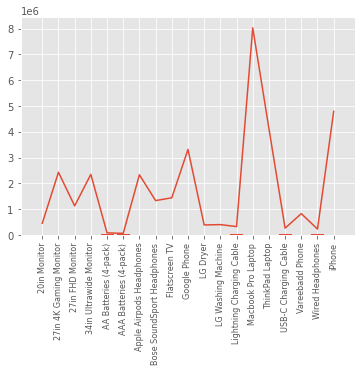

In [130]:
plt.bar(prod,product_group['Quantity Ordered'])
plt.xticks(prod,rotation='vertical',size=8)
plt.plot(prod,product_group['Price Each'])
plt.show()

<ipython-input-137-2901981a5f22>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod,rotation='vertical',size=8)


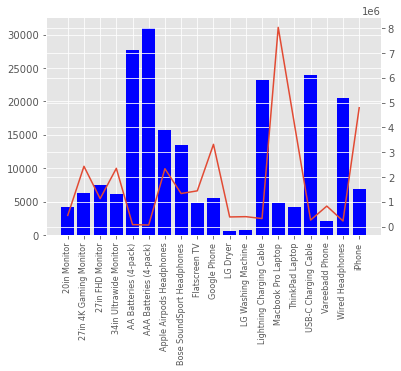

In [137]:
prices = all_files.groupby('Product').mean(['Price Each'])
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(prod,product_group['Quantity Ordered'],color ='b')
ax1.set_xticklabels(prod,rotation='vertical',size=8)
ax2.plot(prod,product_group['Price Each'])
plt.show()
